In [1]:
import matplotlib.pyplot as plt
import numpy as np

Theo tài liệu của thầy:

$$ \text{change in heat} = \text{absorbed solar radiation} - \text{outgoing thermal radiation} + \text{human-caused greenhouse effect} $$

## Mục 1.1
Ở mục này có công thức

$$ \text{change in heat content} = C\frac{dT}{dt} $$

Nên mình dễ dàng tìm được thay đổi nhiệt độ theo thời gian là $\frac{dT}{dt} = \frac{1}{C}(\text{change in heat content})$

## Mục 2.2
Ở mục 2.2 này không biết ở đâu ra thầy đưa ra được công thức:
$$ \text{temp}'(t) = B(\text{temp}(0) - \text{temp}(t)) $$

Với $B = 1.3 W/m^2/C$ (?!). Nhưng mà cũng trong phần này thầy có nói: "Since these physics are too complicated to deal with here, we linearize the model _combining the incoming and the outgoing_." Do đó nên tao nghĩ công thức nó bao hàm cả hai term là $\text{absorbed solar radiation} - \text{outgoing thermal radiation}$ luôn, nên nếu tao gọi $T$ là nhiệt độ Trái đất thay cho $\text{temp}$ thì viết gọn lại nó sẽ được:

$$ \text{absorbed solar radiation} - \text{outgoing thermal radiation} = B(T_0 - T) $$

$T_0$ là gì thầy không nói, chịu luôn.

## Mục 2.3
Thầy cho mình cái công thức:

$$ \text{human-caused greenhouse effect} = FC \ln{\frac{\lvert \text{CO}_2 \rvert}{{\lvert \text{CO}_2 \rvert}_{\text{preindustrial}}}}$$

Và mình có:

$$ \frac{\lvert \text{CO}_2 \rvert}{{\lvert \text{CO}_2 \rvert}_{\text{preindustrial}}} = 1 + \left(\frac{t}{220}\right)^3 $$

Thế lại vào phương trình trên mình có được:

$$ \text{human-caused greenhouse effect} = FC \ln{\left(1 + \left(\frac{t}{220}\right)^3 \right)} $$

Temperature change:

$$ \frac{dT}{dt} = \frac{1}{C} \left( B(T_0 - T) + FC \ln{\left(1 + \left(\frac{t}{220}\right)^3 \right)} \right) $$

where:
* $B = 1.3$
* $FC = 5$
* $T_0$ (some shit I don't know)

In [2]:
C = 51
B = 1.3
FC = 5

T = 0
Ts = [T]

for t in range(250):
    T += 1/C * ((-B)*T + FC * np.log(((1 + (t/220)**3))))
    Ts.append(T)

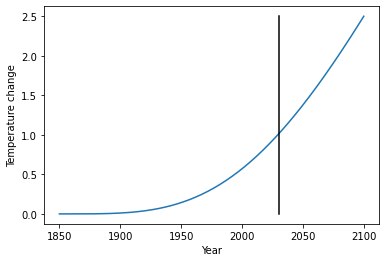

In [3]:
plt.plot(np.arange(1850, 2101), Ts)
plt.plot([2030, 2030], [0, 2.5], color='black')
plt.xlabel('Year')
plt.ylabel('Temperature change');